In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/rt_data_dump.csv')

df.head()

,Unnamed: 0,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,...,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,rt_id.1,_id
0,3910,"‘Cause I don't write shit, ‘cause I ain't got ...",Important to note that he’s saying he doesn’t ...,45,False,accepted,59,A Milli,A Milli by Lil Wayne,39,...,1,3,101534,True,2,Lil Wayne,4,3910,3910,5c8b26d28533e663329276a7
1,7445,With coke in her derriere,Playing on the familiar theme of using a girl ...,30,False,accepted,59,A Milli,A Milli by Lil Wayne,39,...,1,7,478892,True,0,Lil Wayne,4,7445,7445,5c8b26d28533e663329276a6
2,11740,But I would like for you to pay me by the hour,"This is a play on the previous line, where Wee...",7,False,accepted,59,A Milli,A Milli by Lil Wayne,39,...,4,10380,171456,True,1,Lil Wayne,4,11740,11740,5c8b26d28533e663329276a5
3,17243,And it ain't trickin' if you got it,A popular phrase (also used in T.I.’s song “Wh...,10,False,accepted,59,A Milli,A Milli by Lil Wayne,39,...,2,2,102789,True,0,Lil Wayne,4,17243,17243,5c8b26d28533e663329276a4
4,19669,"Bloodsuckin' succubuses, what the fuck is up w...","Succubi (it’s a LATIN plural, Em! But that wou...",45,False,accepted,561,Space Bound,Space Bound by Eminem,19,...,4,7,478892,True,1,Eminem,45,19669,19669,5c8b26d28533e66332926f78


In [4]:
# Drop duplicate columns
df.drop(['Unnamed: 0', 'rt_id.1'], axis=1, inplace=True)

# Drop non-text annotations
img_only_idxs = df[df['tate_text'].isna()].index
df.drop(img_only_idxs, axis=0, inplace=True)

In [5]:
# Create standardized "votes" feature (takes pageviews into account)
df['votes_per_1000views'] = (100000 * df['votes_total'] / df['pageviews']).round(2)
# New features for the number of characters in annotations/referents 
df['chars_in_tate'] = df['tate_text'].str.len()
df['chars_in_referent'] = df['ref_text'].str.len()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3573 entries, 0 to 3580
Data columns (total 26 columns):
ref_text                  3573 non-null object
tate_text                 3573 non-null object
votes_total               3573 non-null int64
verified                  3573 non-null bool
state                     3573 non-null object
song_id                   3573 non-null int64
song_title                3573 non-null object
full_title                3573 non-null object
song_tate_cnt             3573 non-null int64
hot_song                  3573 non-null bool
pageviews                 3573 non-null int64
n_unreviewed_tates        3573 non-null int64
full_lyrics               3573 non-null object
url                       3573 non-null object
n_tate_contributors       3573 non-null int64
primary_contributor_id    3573 non-null int64
primary_contributor_IQ    3573 non-null int64
has_voters                3573 non-null bool
comment_cnt               3573 non-null int64
artist_name    

In [7]:
tdf = df.copy()

In [13]:
df['ref_word_lst'] = df['ref_text'].str.lower().str.split()
df['ref_word_cnt'] = df['ref_word_lst'].str.len()

df[['ref_text', 'ref_word_lst', 'ref_word_cnt']].head()

,ref_text,ref_word_lst,ref_word_cnt
0,"‘Cause I don't write shit, ‘cause I ain't got ...","[‘cause, i, don't, write, shit,, ‘cause, i, ai...",27
1,With coke in her derriere,"[with, coke, in, her, derriere]",5
2,But I would like for you to pay me by the hour,"[but, i, would, like, for, you, to, pay, me, b...",12
3,And it ain't trickin' if you got it,"[and, it, ain't, trickin', if, you, got, it]",8
4,"Bloodsuckin' succubuses, what the fuck is up w...","[bloodsuckin', succubuses,, what, the, fuck, i...",9


In [14]:
df['tate_word_lst'] = df['tate_text'].str.lower().str.split()
df['tate_word_cnt'] = df['tate_word_lst'].str.len()

df[['tate_text', 'tate_word_lst', 'tate_word_cnt']].head()

,tate_text,tate_word_lst,tate_word_cnt
0,Important to note that he’s saying he doesn’t ...,"[important, to, note, that, he’s, saying, he, ...",79
1,Playing on the familiar theme of using a girl ...,"[playing, on, the, familiar, theme, of, using,...",92
2,"This is a play on the previous line, where Wee...","[this, is, a, play, on, the, previous, line,, ...",44
3,A popular phrase (also used in T.I.’s song “Wh...,"[a, popular, phrase, (also, used, in, t.i.’s, ...",79
4,"Succubi (it’s a LATIN plural, Em! But that wou...","[succubi, (it’s, a, latin, plural,, em!, but, ...",25


In [17]:
df['full_lyrics'][0]

'[\'Bangladesh\', \'Young Money!\', \'You dig?\', "Mack, I\'m going in", "A millionaire, I\'m a Young Money millionaire", \'Tougher than Nigerian hair\', "My criteria compared to your career just isn\'t fair", "I\'m a venereal disease, like a menstrual, bleed", \'Through the pencil, and leak on the sheet of the tablet in my mind\', "‘Cause I don\'t write shit, ‘cause I ain\'t got time", \'‘Cause my seconds, minutes, hours go to the almighty dollar\', \'And the almighty power of that ch-cha-cha-chopper\', \'Sister, brother, son, daughter, father; mother-fuck a copper\', "Got the Maserati dancin\' on the bridge, pussy poppin\'", \'Tell the coppers: "Ha-ha-ha-ha\', \'You can\\\'t catch him, you can\\\'t stop him"\', "I go by them goon rules: if you can\'t beat \'em, then you pop \'em", "You can\'t man \'em, then you mop \'em", "You can\'t stand \'em, then you drop \'em", "You pop \'em ‘cause we pop \'em like Orville Redenbacher", "Motherfucker, I\'m ill", \'A million here, a million there

In [19]:
df['full_lyrics'][234]

'[\'Now, everybody from the three-one-three\', \'Put your motherfucking hands up and follow me!\', \'Everybody from the three-one-three\', \'Put your motherfucking hands up! Look, look...\', \'Now, while he stands tough\', \'Notice that this man did not have his hands up\', "This Free World\'s got you gassed up", "Now, who\'s afraid of the Big Bad Wolf?", \'One, two, three, and to the four\', \'One Pac, two Pac, three Pac, four\', \'Four Pac, three Pac, two Pac, one\', "You\'re Pac, he\'s Pac, no Pac, none", "This guy ain\'t no motherfucking MC", "I know everything he\'s \'bout to say against me", \'I am white, I am a fucking bum\', \'I do live in a trailer with my mom\', \'My boy Future is an Uncle Tom\', \'I do got a dumb friend named Cheddar Bob\', \'Who shoots himself in his leg with his own gun\', \'I did get jumped by all six of you chumps\', \'And Wink did fuck my girl\', \'I\\\'m still standing here screaming, "Fuck the Free World!"\', "Don\'t ever try to judge me, dude", "You 

In [25]:
tdf['full_lyrics'][0].split('/')

['[\'Bangladesh\', \'Young Money!\', \'You dig?\', "Mack, I\'m going in", "A millionaire, I\'m a Young Money millionaire", \'Tougher than Nigerian hair\', "My criteria compared to your career just isn\'t fair", "I\'m a venereal disease, like a menstrual, bleed", \'Through the pencil, and leak on the sheet of the tablet in my mind\', "‘Cause I don\'t write shit, ‘cause I ain\'t got time", \'‘Cause my seconds, minutes, hours go to the almighty dollar\', \'And the almighty power of that ch-cha-cha-chopper\', \'Sister, brother, son, daughter, father; mother-fuck a copper\', "Got the Maserati dancin\' on the bridge, pussy poppin\'", \'Tell the coppers: "Ha-ha-ha-ha\', \'You can\\\'t catch him, you can\\\'t stop him"\', "I go by them goon rules: if you can\'t beat \'em, then you pop \'em", "You can\'t man \'em, then you mop \'em", "You can\'t stand \'em, then you drop \'em", "You pop \'em ‘cause we pop \'em like Orville Redenbacher", "Motherfucker, I\'m ill", \'A million here, a million ther

In [27]:
df['song_title'].unique()

array(['A Milli', 'Space Bound', "Cleanin' Out My Closet", 'Superman',
       'Like Toy Soldiers', 'In the Morning', 'Run This Town', 'POWER',
       'Sing for the Moment', "Can't Tell Me Nothing", 'Dark Fantasy',
       'Right Above It', 'Wicked Games', '6 Foot 7 Foot', 'The Morning',
       'Rolling Stone', 'No Love', 'Drop the World', "Marvin's Room",
       'Lost Ones', 'Beautiful', 'The Party & The After Party',
       'Loft Music', 'She Will', 'Work Out', 'The Zone', 'Runaway',
       'Mirror', "Blunt Blowin'", 'Gorgeous', "Can't Get Enough",
       'Initiation', "Nobody's Perfect", 'Shot for Me', 'HYFR',
       '8 Mile: B-Rabbit vs Papa Doc', 'A.D.H.D', 'Over My Dead Body',
       'The Motto', 'Montreal', "When I'm Gone", 'HiiiPoWeR',
       'Not Afraid', 'Mockingbird', "'Till I Collapse", 'The Recipe',
       "Don't Like.1", 'Lose Yourself', 'Renegade',
       'Swimming Pools (Drank)', 'Mercy', 'Clique', 'No Worries',
       'Backseat Freestyle', 'The Art of Peer Pressure',
   

In [28]:
artist_names = df['artist_name'].unique()
artist_names

array(['Lil Wayne', 'Eminem', 'J. Cole', 'JAY-Z', 'Kanye West',
       'The Weeknd', 'Drake', 'Kendrick Lamar', 'Ariana Grande',
       'Beyoncé', 'Original Broadway Cast of Hamilton', 'XXXTENTACION'],
      dtype=object)

In [37]:
df[df['artist_name'] == 'JAY-Z']['artist_id'].unique()[0]

2

In [39]:
artist_id_dict = dict()
for artist_name in artist_names:
    artist_mask = df['artist_name'] == artist_name
    artist_id = df[artist_mask]['artist_id'].unique()[0]
    artist_id_dict[artist_id] = artist_name

artist_id_dict

{4: 'Lil Wayne',
 45: 'Eminem',
 69: 'J. Cole',
 2: 'JAY-Z',
 72: 'Kanye West',
 2358: 'The Weeknd',
 130: 'Drake',
 1421: 'Kendrick Lamar',
 26507: 'Ariana Grande',
 498: 'Beyoncé',
 572149: 'Original Broadway Cast of Hamilton',
 396565: 'XXXTENTACION'}

In [40]:
song_titles = df['song_title'].unique()
song_titles

array(['A Milli', 'Space Bound', "Cleanin' Out My Closet", 'Superman',
       'Like Toy Soldiers', 'In the Morning', 'Run This Town', 'POWER',
       'Sing for the Moment', "Can't Tell Me Nothing", 'Dark Fantasy',
       'Right Above It', 'Wicked Games', '6 Foot 7 Foot', 'The Morning',
       'Rolling Stone', 'No Love', 'Drop the World', "Marvin's Room",
       'Lost Ones', 'Beautiful', 'The Party & The After Party',
       'Loft Music', 'She Will', 'Work Out', 'The Zone', 'Runaway',
       'Mirror', "Blunt Blowin'", 'Gorgeous', "Can't Get Enough",
       'Initiation', "Nobody's Perfect", 'Shot for Me', 'HYFR',
       '8 Mile: B-Rabbit vs Papa Doc', 'A.D.H.D', 'Over My Dead Body',
       'The Motto', 'Montreal', "When I'm Gone", 'HiiiPoWeR',
       'Not Afraid', 'Mockingbird', "'Till I Collapse", 'The Recipe',
       "Don't Like.1", 'Lose Yourself', 'Renegade',
       'Swimming Pools (Drank)', 'Mercy', 'Clique', 'No Worries',
       'Backseat Freestyle', 'The Art of Peer Pressure',
   

In [45]:
for char in song_titles[-1]:
    print('i' + char)

i​
ib
ia
id
i 
ii
id
ie
ia


In [46]:
song_id_dict = dict()
for song_title in song_titles:
    title_mask = df['song_title'] == song_title
    song_id = df[title_mask]['song_id'].unique()[0]
    song_id_dict[song_id] = song_title
song_id_dict

{59: 'A Milli',
 561: 'Space Bound',
 873: "Cleanin' Out My Closet",
 564: 'Superman',
 735: 'Like Toy Soldiers',
 1932: 'In the Morning',
 74: 'Run This Town',
 510: 'POWER',
 1010: 'Sing for the Moment',
 848: "Can't Tell Me Nothing",
 1660: 'Dark Fantasy',
 896: 'Right Above It',
 6310: 'Wicked Games',
 2635: '6 Foot 7 Foot',
 6169: 'The Morning',
 50398: 'Rolling Stone',
 530: 'No Love',
 333: 'Drop the World',
 50895: "Marvin's Room",
 51000: 'Lost Ones',
 545: 'Beautiful',
 50236: 'The Party & The After Party',
 50180: 'Loft Music',
 53819: 'She Will',
 51110: 'Work Out',
 54471: 'The Zone',
 1295: 'Runaway',
 54727: 'Mirror',
 49153: "Blunt Blowin'",
 1791: 'Gorgeous',
 52994: "Can't Get Enough",
 56953: 'Initiation',
 54969: "Nobody's Perfect",
 55601: 'Shot for Me',
 58343: 'HYFR',
 49065: '8 Mile: B-Rabbit vs Papa Doc',
 51801: 'A.D.H.D',
 58661: 'Over My Dead Body',
 58325: 'The Motto',
 61962: 'Montreal',
 1239: "When I'm Gone",
 49129: 'HiiiPoWeR',
 463: 'Not Afraid',
 179

In [62]:
song_title_dict = dict()
for song_title in song_titles:
    title_mask = df['song_title'] == song_title
    song_id = df[title_mask]['song_id'].unique()[0]
    song_title_dict[song_title] = song_id
song_title_dict

{'A Milli': 59,
 'Space Bound': 561,
 "Cleanin' Out My Closet": 873,
 'Superman': 564,
 'Like Toy Soldiers': 735,
 'In the Morning': 1932,
 'Run This Town': 74,
 'POWER': 510,
 'Sing for the Moment': 1010,
 "Can't Tell Me Nothing": 848,
 'Dark Fantasy': 1660,
 'Right Above It': 896,
 'Wicked Games': 6310,
 '6 Foot 7 Foot': 2635,
 'The Morning': 6169,
 'Rolling Stone': 50398,
 'No Love': 530,
 'Drop the World': 333,
 "Marvin's Room": 50895,
 'Lost Ones': 51000,
 'Beautiful': 545,
 'The Party & The After Party': 50236,
 'Loft Music': 50180,
 'She Will': 53819,
 'Work Out': 51110,
 'The Zone': 54471,
 'Runaway': 1295,
 'Mirror': 54727,
 "Blunt Blowin'": 49153,
 'Gorgeous': 1791,
 "Can't Get Enough": 52994,
 'Initiation': 56953,
 "Nobody's Perfect": 54969,
 'Shot for Me': 55601,
 'HYFR': 58343,
 '8 Mile: B-Rabbit vs Papa Doc': 49065,
 'A.D.H.D': 51801,
 'Over My Dead Body': 58661,
 'The Motto': 58325,
 'Montreal': 61962,
 "When I'm Gone": 1239,
 'HiiiPoWeR': 49129,
 'Not Afraid': 463,
 'Mo

In [51]:
by_artist = df.groupby('artist_name')
songs_by_artist = by_artist['song_id'].unique()

type(songs_by_artist)

pandas.core.series.Series

In [53]:
artist_songs_dict = dict()
for artist in artist_names:
    artist_songs_dict[artist] = songs_by_artist[artist]
artist_songs_dict

{'Lil Wayne': array([     59,     896,    2635,     333,   53819,   54727,   49153,
          87069,  105686,  106551,  419570, 3985334, 3985353, 3075914]),
 'Eminem': array([    561,     873,     564,     735,    1010,     530,     545,
          49065,    1239,     463,    1797,     440,     207,     531,
           1197,  204622,  210094,     811,  235732,  235731,  249719,
         235735,  235723,  235727,  235736,  235729,     772,      68,
            532,  505111,  576535, 3309339, 3350682, 3350680, 3350675,
        3930586, 3930555, 3930594, 3930563, 3930564, 3930546, 3930558,
        3958196]),
 'J. Cole': array([   1932,   51000,   51110,   52994,   54969,  118063,   93987,
         164383,  162440,  164344,  162425,  164561,  164574,  164381,
         164496,  164793,  164422,  599388,  599415,  599410,  599427,
         599451,  599442,  599424,  599417,  599407, 2378981, 2922649,
        2922654, 2924244, 2925379, 2924188, 2924189, 2925378, 2923332,
        2925371, 29241

In [54]:
titles_by_artist = by_artist['song_title'].unique()
artist_titles_dict = dict()
for artist in artist_names:
    artist_titles_dict[artist] = titles_by_artist[artist]

artist_titles_dict

{'Lil Wayne': array(['A Milli', 'Right Above It', '6 Foot 7 Foot', 'Drop the World',
        'She Will', 'Mirror', "Blunt Blowin'", 'No Worries', 'Love Me',
        'Rich As Fuck', 'Believe Me', "Don't Cry", 'Uproar', 'Mona Lisa'],
       dtype=object),
 'Eminem': array(['Space Bound', "Cleanin' Out My Closet", 'Superman',
        'Like Toy Soldiers', 'Sing for the Moment', 'No Love', 'Beautiful',
        '8 Mile: B-Rabbit vs Papa Doc', "When I'm Gone", 'Not Afraid',
        'Mockingbird', "'Till I Collapse", 'Lose Yourself',
        'The Real Slim Shady', 'The Way I Am', 'Survival', 'Berzerk',
        'Without Me', 'The Monster', 'Stronger Than I Was', 'Love Game',
        'Headlights', 'Bad Guy', 'Legacy', 'Evil Twin', 'Rap God', 'Stan',
        'My Name Is', 'Love the Way You Lie', 'Guts Over Fear',
        'Detroit vs. Everybody', 'Walk on Water', 'Untouchable', 'River',
        'Believe', 'Fall', 'Greatest',
        'Venom (Music from the Motion Picture)', 'Not Alike', 'Kamikaze',

In [55]:
import lyricsgenius, os
GENIUS_CLIENT_ACCESS_TOKEN = os.environ['GENIUS_CLIENT_ACCESS_TOKEN']

In [56]:
genius = lyricsgenius.Genius(GENIUS_CLIENT_ACCESS_TOKEN, sleep_time=0, verbose=False, remove_section_headers=True)

full_lyrics_dict = dict()

for artist_name in artist_titles_dict.keys():
    for song_title in artist_titles_dict[artist_name]:
        song = genius.search_song(song_title, artist_name)
        lyrics = song.lyrics
        full_lyrics_dict[song_title] = lyrics

full_lyrics_dict['Without Me']

'Obie Trice! Real name, no gimmicks (*record scratch*)\n\nTwo trailer park girls go \'round the outside\n\'Round the outside, \'round the outside\nTwo trailer park girls go \'round the outside\n\'Round the outside, \'round the outside\n\nGuess who\'s back, back again\nShady\'s back, tell a friend\nGuess who\'s back, guess who\'s back\nGuess who\'s back, guess who\'s back\nGuess who\'s back, guess who\'s back\nGuess who\'s back\n\nI\'ve created a monster, ‘cause nobody wants to\nSee Marshall no more, they want Shady, I\'m chopped liver\nWell, if you want Shady, this is what I\'ll give ya\nA little bit of weed mixed with some hard liquor\nSome vodka that\'ll jump start my heart quicker\nThan a shock when I get shocked at the hospital\nBy the doctor when I\'m not co-operating\nWhen I\'m rocking the table while he\'s operating (Hey!)\nYou waited this long, now stop debating\n‘Cause I\'m back, I\'m on the rag and ovulating\nI know that you got a job, Ms. Cheney\nBut your husband\'s heart pr

In [57]:
len(full_lyrics_dict)

391

In [60]:
lyrics_dict = {'song_title':[], 'full_lyrics':[]}
for k, v in full_lyrics_dict.items():
    lyrics_dict['song_title'].append(k)
    lyrics_dict['full_lyrics'].append(v)

lyrics_dict

{'song_title': ['A Milli',
  'Right Above It',
  '6 Foot 7 Foot',
  'Drop the World',
  'She Will',
  'Mirror',
  "Blunt Blowin'",
  'No Worries',
  'Love Me',
  'Rich As Fuck',
  'Believe Me',
  "Don't Cry",
  'Uproar',
  'Mona Lisa',
  'Space Bound',
  "Cleanin' Out My Closet",
  'Superman',
  'Like Toy Soldiers',
  'Sing for the Moment',
  'No Love',
  'Beautiful',
  '8 Mile: B-Rabbit vs Papa Doc',
  "When I'm Gone",
  'Not Afraid',
  'Mockingbird',
  "'Till I Collapse",
  'Lose Yourself',
  'The Real Slim Shady',
  'The Way I Am',
  'Survival',
  'Berzerk',
  'Without Me',
  'The Monster',
  'Stronger Than I Was',
  'Love Game',
  'Headlights',
  'Bad Guy',
  'Legacy',
  'Evil Twin',
  'Rap God',
  'Stan',
  'My Name Is',
  'Love the Way You Lie',
  'Guts Over Fear',
  'Detroit vs. Everybody',
  'Walk on Water',
  'Untouchable',
  'River',
  'Believe',
  'Fall',
  'Greatest',
  'Venom (Music from the Motion Picture)',
  'Not Alike',
  'Kamikaze',
  'The Ringer',
  'Lucky You',
  'K

In [61]:
lyrics_df = pd.DataFrame.from_dict(lyrics_dict, orient='columns')
lyrics_df.head()

,song_title,full_lyrics
0,A Milli,"Bangladesh\nYoung Money!\nYou dig?\nMack, I'm ..."
1,Right Above It,Kane is in the building\n\nWho else is really ...
2,6 Foot 7 Foot,"Six-foot, seven-foot, eight-foot bunch\nSix-fo..."
3,Drop the World,"I got ice in my veins, blood in my eyes\nHate ..."
4,She Will,"I tell her, ""Now go and pop that pussy for a r..."


In [64]:
lyrics_df.to_csv('full_lyrics_by_title.csv')

In [65]:
df.head()

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,hot_song,...,artist_id,rt_id,_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
0,"‘Cause I don't write shit, ‘cause I ain't got ...",Important to note that he’s saying he doesn’t ...,45,False,accepted,59,A Milli,A Milli by Lil Wayne,39,False,...,4,3910,5c8b26d28533e663329276a7,4.81,491,162,"[‘cause, i, don't, write, shit,, ‘cause, i, ai...",27,"[important, to, note, that, he’s, saying, he, ...",79
1,With coke in her derriere,Playing on the familiar theme of using a girl ...,30,False,accepted,59,A Milli,A Milli by Lil Wayne,39,False,...,4,7445,5c8b26d28533e663329276a6,3.20,516,25,"[with, coke, in, her, derriere]",5,"[playing, on, the, familiar, theme, of, using,...",92
2,But I would like for you to pay me by the hour,"This is a play on the previous line, where Wee...",7,False,accepted,59,A Milli,A Milli by Lil Wayne,39,False,...,4,11740,5c8b26d28533e663329276a5,0.75,224,46,"[but, i, would, like, for, you, to, pay, me, b...",12,"[this, is, a, play, on, the, previous, line,, ...",44
3,And it ain't trickin' if you got it,A popular phrase (also used in T.I.’s song “Wh...,10,False,accepted,59,A Milli,A Milli by Lil Wayne,39,False,...,4,17243,5c8b26d28533e663329276a4,1.07,398,35,"[and, it, ain't, trickin', if, you, got, it]",8,"[a, popular, phrase, (also, used, in, t.i.’s, ...",79
4,"Bloodsuckin' succubuses, what the fuck is up w...","Succubi (it’s a LATIN plural, Em! But that wou...",45,False,accepted,561,Space Bound,Space Bound by Eminem,19,False,...,45,19669,5c8b26d28533e66332926f78,4.72,150,55,"[bloodsuckin', succubuses,, what, the, fuck, i...",9,"[succubi, (it’s, a, latin, plural,, em!, but, ...",25


In [66]:
df.columns

Index(['ref_text', 'tate_text', 'votes_total', 'verified', 'state', 'song_id',
       'song_title', 'full_title', 'song_tate_cnt', 'hot_song', 'pageviews',
       'n_unreviewed_tates', 'full_lyrics', 'url', 'n_tate_contributors',
       'primary_contributor_id', 'primary_contributor_IQ', 'has_voters',
       'comment_cnt', 'artist_name', 'artist_id', 'rt_id', '_id',
       'votes_per_1000views', 'chars_in_tate', 'chars_in_referent',
       'ref_word_lst', 'ref_word_cnt', 'tate_word_lst', 'tate_word_cnt'],
      dtype='object')

In [68]:
df.drop('_id', axis=1, inplace=True)

In [69]:
df.columns

Index(['ref_text', 'tate_text', 'votes_total', 'verified', 'state', 'song_id',
       'song_title', 'full_title', 'song_tate_cnt', 'hot_song', 'pageviews',
       'n_unreviewed_tates', 'full_lyrics', 'url', 'n_tate_contributors',
       'primary_contributor_id', 'primary_contributor_IQ', 'has_voters',
       'comment_cnt', 'artist_name', 'artist_id', 'rt_id',
       'votes_per_1000views', 'chars_in_tate', 'chars_in_referent',
       'ref_word_lst', 'ref_word_cnt', 'tate_word_lst', 'tate_word_cnt'],
      dtype='object')

In [71]:
df['verified'].value_counts()

False    3367
True      206
Name: verified, dtype: int64

In [72]:
df['hot_song'].value_counts()

False    3573
Name: hot_song, dtype: int64

In [73]:
df['verified'].value_counts()

False    3367
True      206
Name: verified, dtype: int64

In [74]:
df.drop('hot_song', axis=1, inplace=True)

In [75]:
df['n_unreviewed_tates'].value_counts()

0    2461
1     518
2     188
3     137
4     129
5      80
7      20
8      20
6      20
Name: n_unreviewed_tates, dtype: int64

In [80]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [77]:
# LETS DO SOME REGRESSION STUFF!

x_cols = ['primary_contributor_IQ', 
          'n_tate_contributors', 
          'comment_cnt', 
          'song_tate_cnt', 
          'n_unreviewed_tates', 
          'chars_in_tate', 
          'chars_in_referent', 
          'ref_word_cnt', 
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

In [81]:
X = sm.add_constant(X)

In [82]:
model = sm.OLS(y,X)
results = model.fit()

In [83]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.336
Model:                             OLS   Adj. R-squared:                  0.334
Method:                  Least Squares   F-statistic:                     200.2
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):          1.12e-308
Time:                         20:45:27   Log-Likelihood:                -12001.
No. Observations:                 3573   AIC:                         2.402e+04
Df Residuals:                     3563   BIC:                         2.408e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [84]:
plt.savefig('regression_results.png')

<Figure size 432x288 with 0 Axes>

In [93]:
x_cols = ['primary_contributor_IQ', 
          'n_tate_contributors', 
          'chars_in_tate', 
          'chars_in_referent', 
          'ref_word_cnt', 
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

In [92]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.050
Method:                  Least Squares   F-statistic:                     32.26
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):           5.10e-38
Time:                         20:59:39   Log-Likelihood:                -12637.
No. Observations:                 3573   AIC:                         2.529e+04
Df Residuals:                     3566   BIC:                         2.533e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [94]:
x_corr = X.corr()
x_corr

,primary_contributor_IQ,n_tate_contributors,chars_in_tate,chars_in_referent,ref_word_cnt,tate_word_cnt
primary_contributor_IQ,1.000000,0.067951,0.062309,0.055785,0.049555,0.053963
n_tate_contributors,0.067951,1.000000,0.246834,0.201251,0.199323,0.237746
chars_in_tate,0.062309,0.246834,1.000000,0.177802,0.169874,0.992175
chars_in_referent,0.055785,0.201251,0.177802,1.000000,0.990064,0.181658
ref_word_cnt,0.049555,0.199323,0.169874,0.990064,1.000000,0.175809
tate_word_cnt,0.053963,0.237746,0.992175,0.181658,0.175809,1.000000


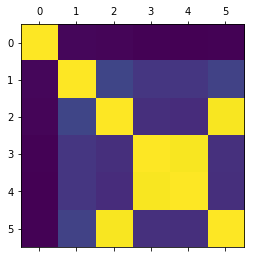

In [95]:
plt.matshow(x_corr)

In [99]:
x_cols = ['primary_contributor_IQ', 
          'n_tate_contributors', 
          'comment_cnt', 
          'song_tate_cnt', 
          'n_unreviewed_tates',  
          'ref_word_cnt', 
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

In [100]:
x_corr = X.corr()
x_corr

,primary_contributor_IQ,n_tate_contributors,comment_cnt,song_tate_cnt,n_unreviewed_tates,ref_word_cnt,tate_word_cnt
primary_contributor_IQ,1.000000,0.067951,0.007204,-0.028168,-0.131045,0.049555,0.053963
n_tate_contributors,0.067951,1.000000,-0.041949,-0.196607,-0.203829,0.199323,0.237746
comment_cnt,0.007204,-0.041949,1.000000,0.104483,-0.025633,0.043667,0.015246
song_tate_cnt,-0.028168,-0.196607,0.104483,1.000000,0.284752,-0.234037,-0.071440
n_unreviewed_tates,-0.131045,-0.203829,-0.025633,0.284752,1.000000,-0.201329,-0.090002
ref_word_cnt,0.049555,0.199323,0.043667,-0.234037,-0.201329,1.000000,0.175809
tate_word_cnt,0.053963,0.237746,0.015246,-0.071440,-0.090002,0.175809,1.000000


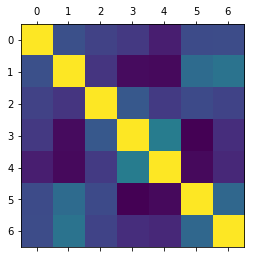

In [101]:
plt.matshow(x_corr)

In [102]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.332
Model:                             OLS   Adj. R-squared:                  0.330
Method:                  Least Squares   F-statistic:                     252.7
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):          3.54e-306
Time:                         21:02:15   Log-Likelihood:                -12012.
No. Observations:                 3573   AIC:                         2.404e+04
Df Residuals:                     3565   BIC:                         2.409e+04
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [105]:
x_cols = ['primary_contributor_IQ', 
          'n_tate_contributors', 
          'comment_cnt', 
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

                        primary_contributor_IQ  n_tate_contributors  \
primary_contributor_IQ                1.000000             0.067951   
n_tate_contributors                   0.067951             1.000000   
comment_cnt                           0.007204            -0.041949   
tate_word_cnt                         0.053963             0.237746   

                        comment_cnt  tate_word_cnt  
primary_contributor_IQ     0.007204       0.053963  
n_tate_contributors       -0.041949       0.237746  
comment_cnt                1.000000       0.015246  
tate_word_cnt              0.015246       1.000000  


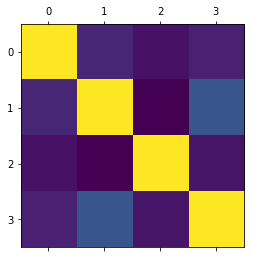

In [106]:
x_corr = X.corr()
print(x_corr)
plt.matshow(x_corr)

In [107]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.296
Model:                             OLS   Adj. R-squared:                  0.295
Method:                  Least Squares   F-statistic:                     375.3
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):          4.11e-270
Time:                         21:04:36   Log-Likelihood:                -12104.
No. Observations:                 3573   AIC:                         2.422e+04
Df Residuals:                     3568   BIC:                         2.425e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [111]:
x_cols = ['primary_contributor_IQ',
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

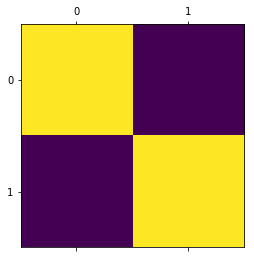

In [112]:
x_corr = X.corr()
plt.matshow(x_corr)

In [113]:
x_corr

,primary_contributor_IQ,tate_word_cnt
primary_contributor_IQ,1.000000,0.053963
tate_word_cnt,0.053963,1.000000


In [114]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.017
Model:                             OLS   Adj. R-squared:                  0.016
Method:                  Least Squares   F-statistic:                     30.84
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):           5.27e-14
Time:                         21:06:11   Log-Likelihood:                -12701.
No. Observations:                 3573   AIC:                         2.541e+04
Df Residuals:                     3570   BIC:                         2.543e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [115]:
x_cols = 'primary_contributor_IQ'
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

In [116]:
x_corr = X.corr()
plt.matshow(x_corr)

TypeError: corr() missing 1 required positional argument: 'other'

In [117]:
x_corr

,primary_contributor_IQ,tate_word_cnt
primary_contributor_IQ,1.000000,0.053963
tate_word_cnt,0.053963,1.000000


In [118]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     11.76
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):           0.000612
Time:                         21:08:14   Log-Likelihood:                -12726.
No. Observations:                 3573   AIC:                         2.546e+04
Df Residuals:                     3571   BIC:                         2.547e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const             

In [136]:
x_cols = 'tate_word_cnt'
y_col = 'votes_total'

X = df[x_cols]
y = df[y_col]

In [137]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            votes_total   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     41.41
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           1.40e-10
Time:                        21:28:30   Log-Likelihood:                -23160.
No. Observations:                3573   AIC:                         4.632e+04
Df Residuals:                    3571   BIC:                         4.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            41.3440      4.701      8.795

In [127]:
x_cols = ['n_tate_contributors', 
          'comment_cnt', 
          'song_tate_cnt',  
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

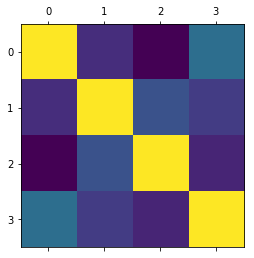

In [128]:
x_corr = X.corr()
plt.matshow(x_corr)

In [129]:
X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     votes_per_1000views   R-squared:                       0.323
Model:                             OLS   Adj. R-squared:                  0.322
Method:                  Least Squares   F-statistic:                     425.4
Date:                 Sun, 17 Mar 2019   Prob (F-statistic):          4.18e-300
Time:                         21:11:02   Log-Likelihood:                -12035.
No. Observations:                 3573   AIC:                         2.408e+04
Df Residuals:                     3568   BIC:                         2.411e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

In [131]:
import seaborn as sns

In [133]:
x_cols = ['primary_contributor_IQ', 
          'n_tate_contributors', 
          'comment_cnt', 
          'song_tate_cnt', 
          'n_unreviewed_tates', 
          'chars_in_tate', 
          'chars_in_referent', 
          'ref_word_cnt', 
          'tate_word_cnt']
y_col = 'votes_per_1000views'

X = df[x_cols]
y = df[y_col]

reg_cols = ['votes_per_1000views', 
            'primary_contributor_IQ', 
          'n_tate_contributors', 
          'comment_cnt', 
          'song_tate_cnt', 
          'n_unreviewed_tates', 
          'chars_in_tate', 
          'chars_in_referent', 
          'ref_word_cnt', 
          'tate_word_cnt']
regr_df = df[reg_cols]

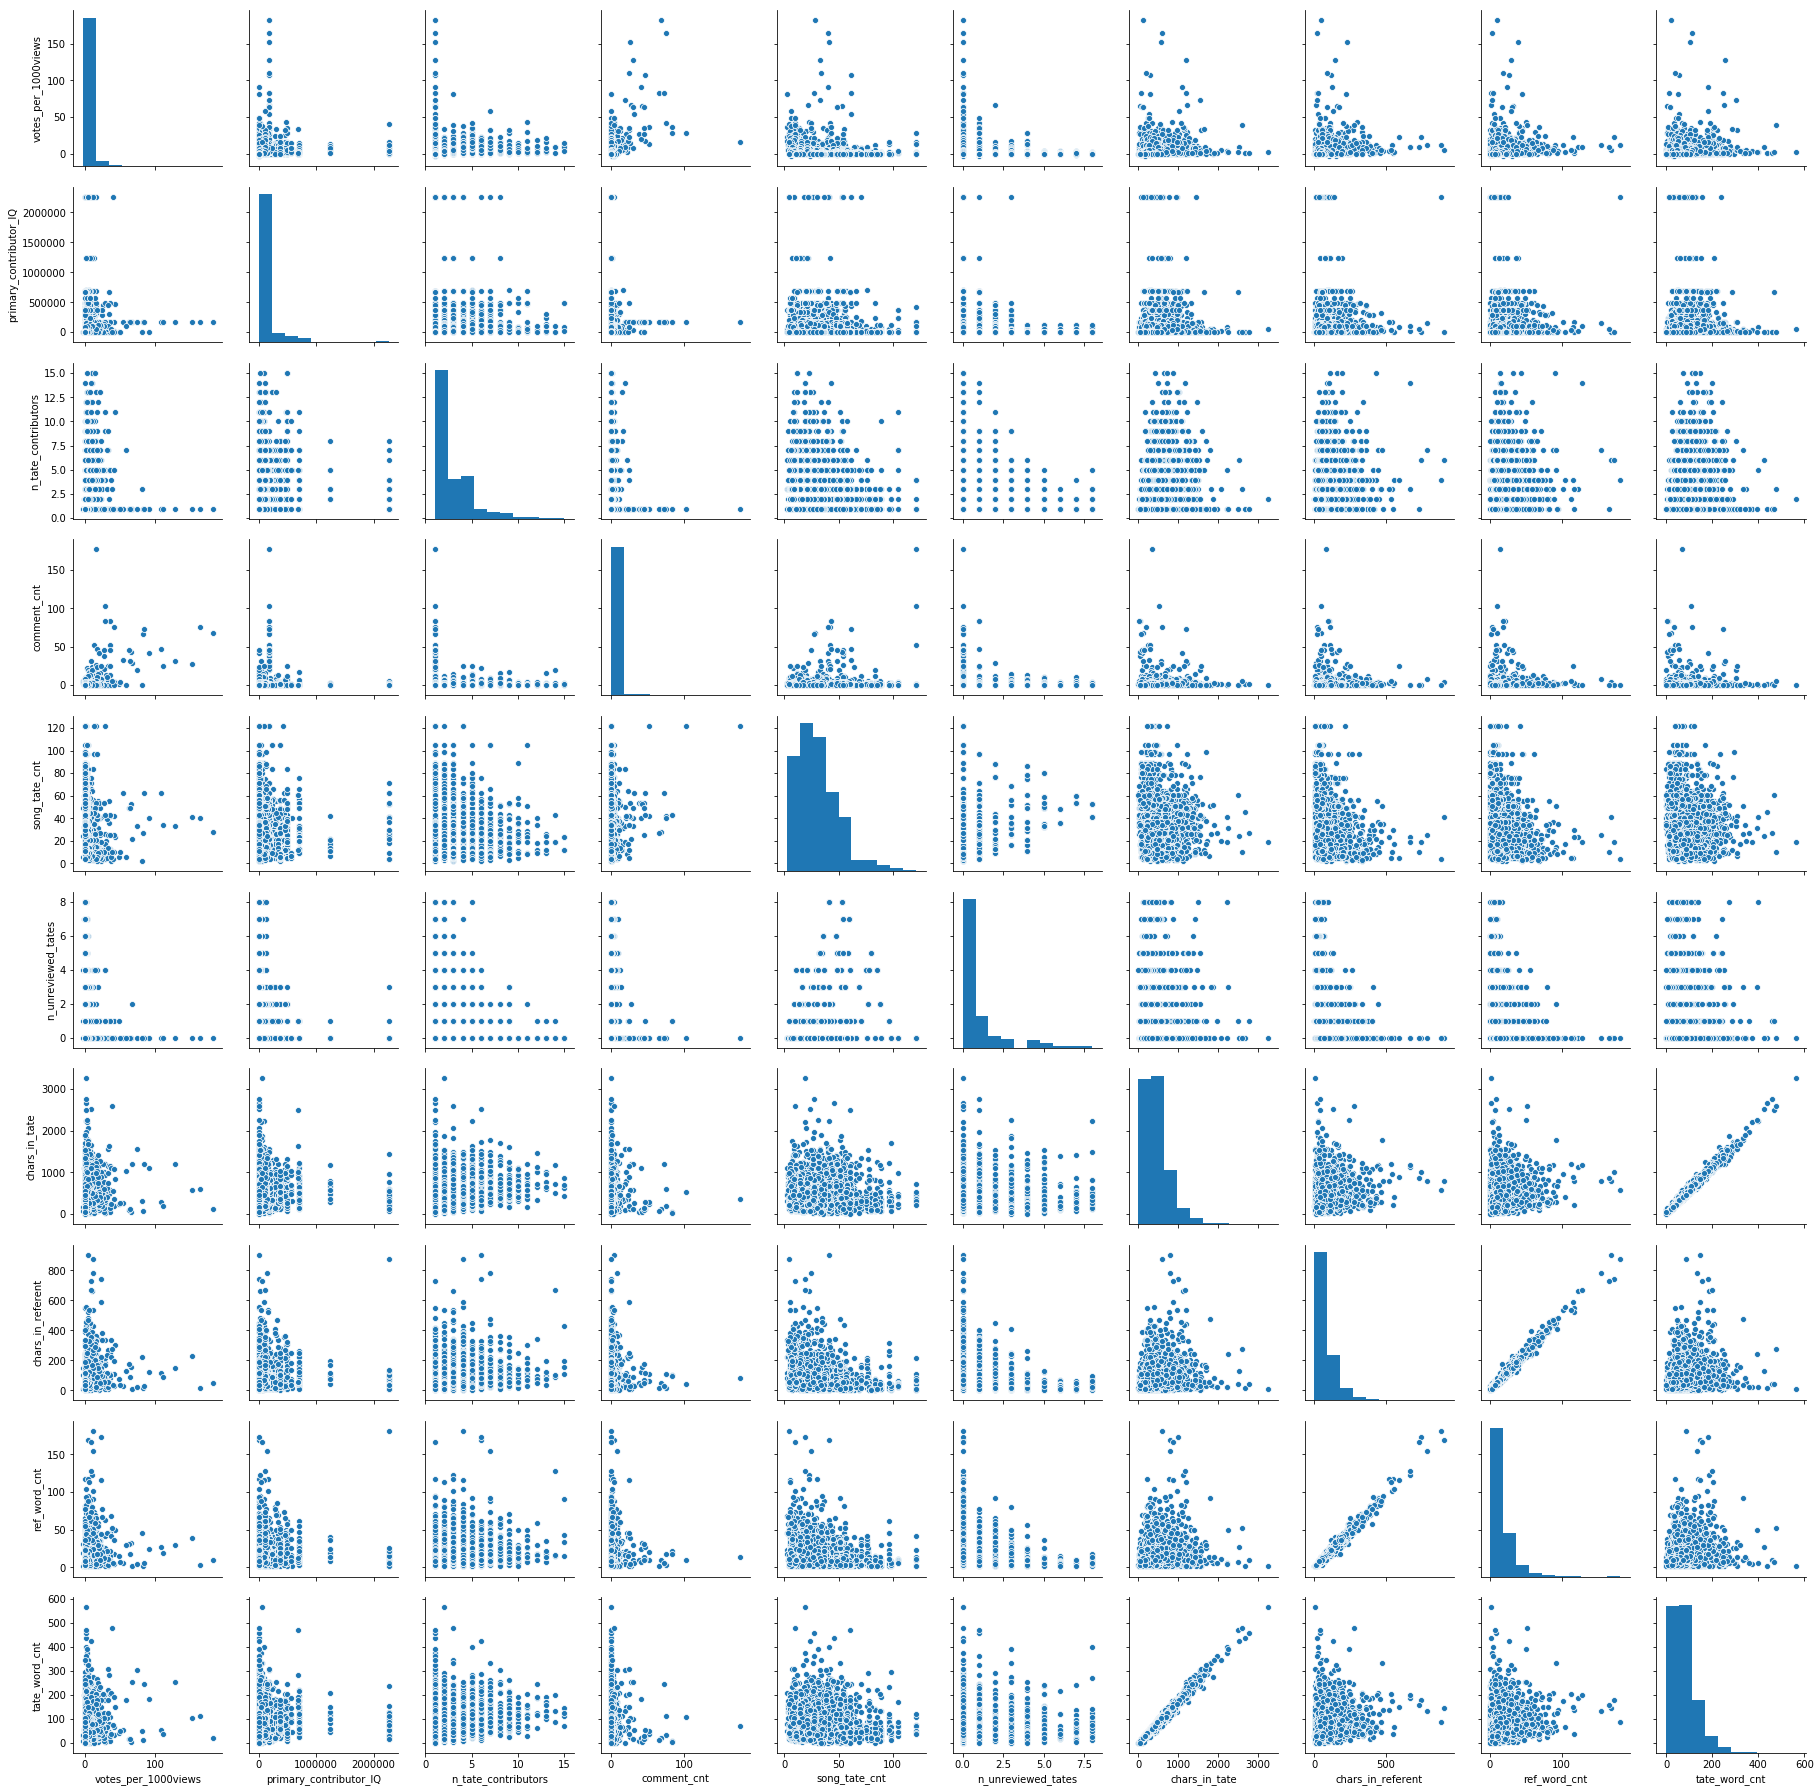

In [134]:
sns.pairplot(regr_df)

In [135]:
df['comment_cnt'].value_counts()

0      2030
1       735
2       335
3       167
4       101
5        64
6        29
7        19
8        15
9        11
10       10
12        6
25        4
13        4
45        3
20        3
31        3
14        2
52        2
75        2
47        2
84        2
15        2
11        2
23        2
21        2
73        1
43        1
41        1
27        1
19        1
17        1
22        1
103       1
26        1
28        1
32        1
38        1
42        1
66        1
68        1
177       1
Name: comment_cnt, dtype: int64

In [138]:
df['comment_cnt'].max()

177

In [140]:
pd.set_option("display.max_columns",100)

In [141]:
df[df['comment_cnt'] == df['comment_cnt'].max()]

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
1358,"Ungh, school flunky, pill junkie\n But look at...",I don’t ever want to be too braggadocious. If ...,2151,True,verified,235729,Rap God,Rap God by Eminem,122,13873324,0,"['""Look, I was gonna go easy on you not to hur...",https://genius.com/5140282/Eminem-rap-god/Ungh...,1,1628085,170417,True,177,Eminem,45,5140282,15.5,348,81,"[ungh,, school, flunky,, pill, junkie, but, lo...",14,"[i, don’t, ever, want, to, be, too, braggadoci...",71


In [142]:
df.head()

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
0,"‘Cause I don't write shit, ‘cause I ain't got ...",Important to note that he’s saying he doesn’t ...,45,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/3910/Lil-wayne-a-milli/Caus...,1,3,101534,True,2,Lil Wayne,4,3910,4.81,491,162,"[‘cause, i, don't, write, shit,, ‘cause, i, ai...",27,"[important, to, note, that, he’s, saying, he, ...",79
1,With coke in her derriere,Playing on the familiar theme of using a girl ...,30,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/7445/Lil-wayne-a-milli/With...,1,7,478892,True,0,Lil Wayne,4,7445,3.20,516,25,"[with, coke, in, her, derriere]",5,"[playing, on, the, familiar, theme, of, using,...",92
2,But I would like for you to pay me by the hour,"This is a play on the previous line, where Wee...",7,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/11740/Lil-wayne-a-milli/But...,4,10380,171456,True,1,Lil Wayne,4,11740,0.75,224,46,"[but, i, would, like, for, you, to, pay, me, b...",12,"[this, is, a, play, on, the, previous, line,, ...",44
3,And it ain't trickin' if you got it,A popular phrase (also used in T.I.’s song “Wh...,10,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/17243/Lil-wayne-a-milli/And...,2,2,102789,True,0,Lil Wayne,4,17243,1.07,398,35,"[and, it, ain't, trickin', if, you, got, it]",8,"[a, popular, phrase, (also, used, in, t.i.’s, ...",79
4,"Bloodsuckin' succubuses, what the fuck is up w...","Succubi (it’s a LATIN plural, Em! But that wou...",45,False,accepted,561,Space Bound,Space Bound by Eminem,19,952636,0,"[""We touch, I feel a rush; we clutch, it isn't...",https://genius.com/19669/Eminem-space-bound/Bl...,4,7,478892,True,1,Eminem,45,19669,4.72,150,55,"[bloodsuckin', succubuses,, what, the, fuck, i...",9,"[succubi, (it’s, a, latin, plural,, em!, but, ...",25


In [144]:
df.nsmallest(3, 'votes_per_1000views')

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
715,Try to deny it as much as you want\n But in ti...,They can say they don’t love each-other but as...,-9,False,accepted,203953,Almost Is Never Enough,Almost Is Never Enough by Ariana Grande (Ft. N...,6,332156,1,"[""I'd like to say we gave it a try"", ""I'd like...",https://genius.com/2222801/Ariana-grande-almos...,1,187843,203,True,2,Ariana Grande,26507,2222801,-2.71,158,151,"[try, to, deny, it, as, much, as, you, want, b...",31,"[they, can, say, they, don’t, love, each-other...",30
1252,"Everyday, I was strugglin' to learn what life'...","Although it may sound like andale, it may be “...",-46,True,verified,703734,Legend,Legend by Drake,24,1904625,0,"['Yeah', 'When I pull up on a nigga tell that ...",https://genius.com/5023358/Drake-legend/Everyd...,1,526037,77,True,4,Drake,130,5023358,-2.42,166,105,"[everyday,, i, was, strugglin', to, learn, wha...",19,"[although, it, may, sound, like, andale,, it, ...",33
2913,Hamilton,It bothered me that this wasn’t highlighted li...,-14,False,pending,2315167,Cabinet Battle #2,Cabinet Battle #2 by Original Broadway Cast of...,49,716566,4,['The issue on the table: France is on the ver...,https://genius.com/13660449/Original-broadway-...,1,5868330,90,True,5,Original Broadway Cast of Hamilton,572149,13660449,-1.95,65,8,[hamilton],1,"[it, bothered, me, that, this, wasn’t, highlig...",10


In [158]:
bottom_3 = [rt_id for rt_id in df.nsmallest(3, 'votes_per_1000views')['rt_id']]
bottom_3

[2222801, 5023358, 13660449]

In [160]:
# bottom_3_rtid = [2222801, 5023358, 13660449]
top_3 = [rt_id for rt_id in df.nlargest(4, 'votes_per_1000views')['rt_id']]
top_3.remove(5140263)
top_3

[8828663, 5140224, 5140209]

In [156]:
df.nlargest(4, 'votes_per_1000views')

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
1872,Where's my snare?\n I have no snare in my head...,This was true. I was recording and couldn’t he...,1809,True,verified,873,Cleanin' Out My Closet,Cleanin' Out My Closet by Eminem,28,996231,0,"[""Where's my snare?"", 'I have no snare in my h...",https://genius.com/8828663/Eminem-cleanin-out-...,1,1628085,170417,True,68,Eminem,45,8828663,181.58,113,51,"[where's, my, snare?, i, have, no, snare, in, ...",10,"[this, was, true., i, was, recording, and, cou...",22
1356,[Verse 1: Eminem],This is where I was dealing with critics who d...,1408,True,verified,1010,Sing for the Moment,Sing for the Moment by Eminem,40,857823,0,['These ideas are nightmares to white parents'...,https://genius.com/5140263/Eminem-sing-for-the...,1,1628085,170417,True,75,Eminem,45,5140263,164.14,598,17,"[[verse, 1:, eminem]]",3,"[this, is, where, i, was, dealing, with, criti...",112
1350,"See, I'm a poet to some, a regular modern-day ...","When I’m writing, I’m in the syllable game. I’...",1253,True,verified,78,Renegade,Renegade by JAY-Z (Ft. Eminem),41,824447,0,"[""Motherfuckers say that I'm foolish, I only t...",https://genius.com/5140224/Jay-z-renegade/See-...,1,1628085,170421,True,27,JAY-Z,2,5140224,151.98,569,227,"[see,, i'm, a, poet, to, some,, a, regular, mo...",39,"[when, i’m, writing,, i’m, in, the, syllable, ...",103
1349,"Hi, my name is, what? My name is, who?\n My na...","Dre put on the Labi Siffre record, and I was j...",1270,True,verified,68,My Name Is,My Name Is by Eminem,33,993644,0,"['Hi, my name is, what? My name is, who?', 'My...",https://genius.com/5140209/Eminem-my-name-is/H...,1,1628085,170417,True,31,Eminem,45,5140209,127.81,1205,148,"[hi,, my, name, is,, what?, my, name, is,, who...",30,"[dre, put, on, the, labi, siffre, record,, and...",256


In [147]:
df[df['chars_in_referent'] <= 30].shape

(842, 28)

In [150]:
df[df['ref_word_cnt'] <= 3].shape

(438, 28)

In [162]:
short_refs = df[df['ref_word_cnt'] <= 3]['ref_text'].unique()
tags_to_remove = []
short_refs_to_keep = []

for ref in short_refs:
    if ref[0] == '[' and ref[-1] == ']':
        tags_to_remove.append(ref)
    else:
        short_refs_to_keep.append(ref)

print(tags_to_remove)

['[Verse 2]', '[Verse 3]', '[Verse 1]', '[Outro: Ab-Soul]', '[Bridge: Alori Joh]', '[Verse 3: Drake]', '[Chorus: Nate Dogg]', '[Chorus: Big Sean]', '[Chorus]', '[Produced by Hit-Boy]', '[Outro: Big Sean]', '[Bridge]', '[Hook 1]', '[Interlude: Sherane]', '[Hook: Swizz Beatz]', '[Intro]', '[Hook]', '[Chorus: James Fauntleroy]', '[Verse 1: Drake]', '[Pre-Chorus: Miguel]', '[Verse 2: Drake]', '[Death to Molly]', '[Verse 3: Eminem]', '[Verse: Kanye West]', '[Bridge: Justin Vernon]', '[Verse 2: Assassin]', '[Outro: Beyoncé]', '[Chorus: Justin Timberlake]', '[Hook: Jay Z]', '[Chorus: Kid Cudi]', '[Hook: Sampha]', '[Verse 4: Drake]', '[Intro: Jimmy Smith]', '[Music Video]', '[Intro: Kendrick Lamar]', '[Produced by Sounwave]', '[Intro: Nate Ruess]', '[Hook: Jhene Aiko]', '[Verse 2: Beyoncé]', '[Pre-Chorus Beyoncé]', '[Bridge: Beyonce]', '[Part 2: ***Flawless]', '[Pre-Chorus: Drake]', '[Verse 2: Eminem]', '[Outro: Kanye West]', '[Pre-Hook: Drake]', '[Produced by DVLP]', '[Produced by T-Minus]', 

In [179]:
len(tags_to_remove)

123

In [178]:
len(short_refs_to_keep)

210

In [165]:
short_refs_to_keep

['(Yeah)',
 'Eastside,',
 'Alisha, Catya,',
 'Hey, Globetrotter,',
 'Death over dishonor',
 '(21st-Century schizoid man)',
 '(This Chicago, nigga!)',
 'Verse 2: Eminem',
 'This whole rhapsody',
 "She rollin',",
 'Tunechi',
 'Yuugh!',
 '"Well, I\'m sorry."',
 'Bruce Almighty',
 '(Bang!)',
 'Started…',
 "Goddamn, I'm high",
 'You cannot survive',
 "I'm in trouble",
 'Except',
 'Kóbor János',
 'Silk and fleeces,',
 'Picasso baby',
 'So throwed',
 'AAAAAAAAAAAAAHHHHHHHHHHHH!!',
 'Oh, man,',
 'Big Sean',
 'Justin Vernon',
 'Kids!',
 'Big time\n Sunshine,',
 "Well, that's nothin'",
 'Rekcufrehtom!',
 'C3, 3 Peat',
 'Blowing',
 'Brooklyn brim',
 '(Yeezy taught me)',
 'Gangster wife',
 'Lil Wayne',
 "It's funny",
 'Eminem',
 'Served to survive,',
 'Like what',
 'Gone',
 'Rip rip, nigga',
 '(Right, right, right)',
 "Explodin'",
 'Somebody help',
 '(The make up)',
 '11th grade',
 'Chorus',
 'You goat-mouth mammyfucker',
 '(Woman moaning)',
 'Look, look...',
 '(I gotta leave)',
 '(Guitar Solo)',


In [177]:
# COMPLETELY REMOVE
add_to_remove = ['Intro:', 'ENSEMBLE', 'JEFFERSON', '[Chorus: KING GEORGE', '*Space Bar Tap*', 'BURR', 'LEE', '(Guitar Solo)', '(21st-Century schizoid man)']
# CHANGE/EDIT
edit_values = ['[HAMILTON]\n No', '[HAMILTON]\n Sir!', '[HAMILTON]\n Ha', '[HAMILTON]\n What?']
# OK
ok = ['Mr. President', 'Mr. Vice President:', '“President John Adams”', 'Hamilton', 'Maty Noyes']

In [180]:
len(add_to_remove)

9

In [214]:
replace_dict = {'[HAMILTON]\n No':'No', '[HAMILTON]\n Sir!': 'Sir!', '[HAMILTON]\n Ha': 'Ha', '[HAMILTON]\n What?': 'What?'}
replace_dict

{'[HAMILTON]\n No': 'No',
 '[HAMILTON]\n Sir!': 'Sir!',
 '[HAMILTON]\n Ha': 'Ha',
 '[HAMILTON]\n What?': 'What?'}

In [216]:
edit_idxs = []

for bad_ref in edit_values: 
    mask = df['ref_text'] == bad_ref
    bad_idxs = list(df[mask].index)
    for i in bad_idxs:
        edit_idxs.append(i)
edit_idxs

[2776, 3156, 1643, 1598]

In [218]:
df['ref_text'].replace(replace_dict)[[2776, 3156, 1643, 1598]]

2776       No
3156     Sir!
1643       Ha
1598    What?
Name: ref_text, dtype: object

In [219]:
df['ref_text'].replace(replace_dict, inplace=True)

In [187]:
list(df[df['ref_text'] == 'Hamilton'].index)
# df[df['ref_text'] == 'Hamilton'].index

[1694, 2913]

In [181]:
for i in add_to_remove:
    tags_to_remove.append(i)
    short_refs_to_keep.remove(i)

# 123 + 9 = 132
print(len(tags_to_remove))
# 210 - 9 = 201
print(len(short_refs_to_keep))

132
201


In [202]:
tags_to_remove.append('Verse 2: Eminem')
short_refs_to_keep.remove('Verse 2: Eminem')

In [203]:
rt_idxs_to_drop = []
for bad_ref in tags_to_remove: 
    mask = df['ref_text'] == bad_ref
    bad_idxs = list(df[mask].index)
    for i in bad_idxs:
        rt_idxs_to_drop.append(i)
rt_idxs_to_drop

[45,
 286,
 349,
 387,
 608,
 621,
 645,
 1088,
 1094,
 1100,
 1178,
 1195,
 1384,
 1986,
 2002,
 2707,
 2717,
 2918,
 70,
 284,
 445,
 609,
 622,
 885,
 958,
 2186,
 2187,
 2786,
 167,
 457,
 558,
 607,
 766,
 1152,
 1156,
 1158,
 1166,
 1219,
 1311,
 1404,
 2139,
 2241,
 2710,
 215,
 232,
 249,
 979,
 309,
 317,
 329,
 385,
 386,
 410,
 905,
 1263,
 1324,
 2244,
 2294,
 331,
 354,
 367,
 875,
 3457,
 371,
 378,
 415,
 417,
 767,
 1066,
 1197,
 1351,
 1385,
 1533,
 3360,
 418,
 907,
 1176,
 425,
 1832,
 427,
 817,
 428,
 431,
 745,
 818,
 957,
 434,
 460,
 3562,
 573,
 578,
 579,
 634,
 640,
 646,
 2245,
 663,
 692,
 696,
 838,
 3499,
 698,
 716,
 755,
 1318,
 2650,
 764,
 912,
 1283,
 804,
 824,
 837,
 841,
 848,
 849,
 858,
 867,
 1065,
 3561,
 878,
 888,
 898,
 903,
 1407,
 906,
 948,
 950,
 953,
 1192,
 1411,
 987,
 1022,
 1355,
 1356,
 2756,
 1037,
 1098,
 1102,
 1189,
 1227,
 1278,
 1323,
 1346,
 1362,
 1368,
 1401,
 1405,
 1415,
 2228,
 1450,
 2634,
 1451,
 1496,
 1539,
 1546,


In [204]:
len(rt_idxs_to_drop)

230

In [205]:
df.shape

(3573, 28)

In [206]:
3573 - 230

3343

In [208]:
test = df.drop(rt_idxs_to_drop, axis=0)
test.shape

(3343, 28)

In [211]:
df.drop(rt_idxs_to_drop, axis=0, inplace=True)

In [213]:
df.shape

(3343, 28)

In [209]:
test[test['ref_text'] == 'ENSEMBLE']

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt


In [210]:
test[test['ref_word_cnt'] <= 3]['ref_text'].unique()

array(['(Yeah)', 'Eastside,', 'Alisha, Catya,', 'Hey, Globetrotter,',
       'Death over dishonor', '(This Chicago, nigga!)',
       'This whole rhapsody', "She rollin',", 'Tunechi', 'Yuugh!',
       '"Well, I\'m sorry."', 'Bruce Almighty', '(Bang!)', 'Started…',
       "Goddamn, I'm high", 'You cannot survive', "I'm in trouble",
       'Except', 'Kóbor János', 'Silk and fleeces,', 'Picasso baby',
       'So throwed', 'AAAAAAAAAAAAAHHHHHHHHHHHH!!', 'Oh, man,',
       'Big Sean', 'Justin Vernon', 'Kids!', 'Big time\n Sunshine,',
       "Well, that's nothin'", 'Rekcufrehtom!', 'C3, 3 Peat', 'Blowing',
       'Brooklyn brim', '(Yeezy taught me)', 'Gangster wife', 'Lil Wayne',
       "It's funny", 'Eminem', 'Served to survive,', 'Like what', 'Gone',
       'Rip rip, nigga', '(Right, right, right)', "Explodin'",
       'Somebody help', '(The make up)', '11th grade', 'Chorus',
       'You goat-mouth mammyfucker', '(Woman moaning)', 'Look, look...',
       '(I gotta leave)', 'My, my God,', 'I

In [201]:
df.drop(df[df['ref_text']=='Verse 2: Eminem'].index, axis=0)

,ref_text,tate_text,votes_total,verified,state,song_id,song_title,full_title,song_tate_cnt,pageviews,n_unreviewed_tates,full_lyrics,url,n_tate_contributors,primary_contributor_id,primary_contributor_IQ,has_voters,comment_cnt,artist_name,artist_id,rt_id,votes_per_1000views,chars_in_tate,chars_in_referent,ref_word_lst,ref_word_cnt,tate_word_lst,tate_word_cnt
0,"‘Cause I don't write shit, ‘cause I ain't got ...",Important to note that he’s saying he doesn’t ...,45,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/3910/Lil-wayne-a-milli/Caus...,1,3,101534,True,2,Lil Wayne,4,3910,4.81,491,162,"[‘cause, i, don't, write, shit,, ‘cause, i, ai...",27,"[important, to, note, that, he’s, saying, he, ...",79
1,With coke in her derriere,Playing on the familiar theme of using a girl ...,30,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/7445/Lil-wayne-a-milli/With...,1,7,478892,True,0,Lil Wayne,4,7445,3.20,516,25,"[with, coke, in, her, derriere]",5,"[playing, on, the, familiar, theme, of, using,...",92
2,But I would like for you to pay me by the hour,"This is a play on the previous line, where Wee...",7,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/11740/Lil-wayne-a-milli/But...,4,10380,171456,True,1,Lil Wayne,4,11740,0.75,224,46,"[but, i, would, like, for, you, to, pay, me, b...",12,"[this, is, a, play, on, the, previous, line,, ...",44
3,And it ain't trickin' if you got it,A popular phrase (also used in T.I.’s song “Wh...,10,False,accepted,59,A Milli,A Milli by Lil Wayne,39,936461,0,"['Bangladesh', 'Young Money!', 'You dig?', ""Ma...",https://genius.com/17243/Lil-wayne-a-milli/And...,2,2,102789,True,0,Lil Wayne,4,17243,1.07,398,35,"[and, it, ain't, trickin', if, you, got, it]",8,"[a, popular, phrase, (also, used, in, t.i.’s, ...",79
4,"Bloodsuckin' succubuses, what the fuck is up w...","Succubi (it’s a LATIN plural, Em! But that wou...",45,False,accepted,561,Space Bound,Space Bound by Eminem,19,952636,0,"[""We touch, I feel a rush; we clutch, it isn't...",https://genius.com/19669/Eminem-space-bound/Bl...,4,7,478892,True,1,Eminem,45,19669,4.72,150,55,"[bloodsuckin', succubuses,, what, the, fuck, i...",9,"[succubi, (it’s, a, latin, plural,, em!, but, ...",25
5,Where's my snare?\n I have no snare in my head...,Eminem went on to directly reference this intr...,21,False,accepted,873,Cleanin' Out My Closet,Cleanin' Out My Closet by Eminem,28,996231,0,"[""Where's my snare?"", 'I have no snare in my h...",https://genius.com/26985/Eminem-cleanin-out-my...,3,3294741,1029,True,0,Eminem,45,26985,2.11,159,51,"[where's, my, snare?, i, have, no, snare, in, ...",10,"[eminem, went, on, to, directly, reference, th...",27
6,"Love that tattoo, what's that say?\n ""Rot In P...",This girl pretends to admire Em’s clever play ...,68,False,accepted,564,Superman,Superman by Eminem (Ft. Dina Rae),21,877266,1,"['Mhmmm *inhales*', 'You high, baby?', 'Yeah',...",https://genius.com/26997/Eminem-superman/Love-...,2,474,1620,True,2,Eminem,45,26997,7.75,386,69,"[love, that, tattoo,, what's, that, say?, ""rot...",12,"[this, girl, pretends, to, admire, em’s, cleve...",70
7,Babysit? You make me sick\n Superman ain't sav...,Eminem isn’t interested in taking part in the ...,31,False,accepted,564,Superman,Superman by Eminem (Ft. Dina Rae),21,877266,1,"['Mhmmm *inhales*', 'You high, baby?', 'Yeah',...",https://genius.com/27738/Eminem-superman/Babys...,5,779,362521,True,1,Eminem,45,27738,3.53,449,53,"[babysit?, you, make, me, sick, superman, ain'...",9,"[eminem, isn’t, interested, in, taking, part, ...",80
8,"Straight from the hip, cut to the chase\n I te...",He is done trying to spit game to chicks and h...,34,False,accepted,564,Superman,Superman by Eminem (Ft. Dina Rae),21,877266,1,"['Mhmmm *inhales*', 'You high, baby?', 'Yeah',...",h

In [154]:
df[df['ref_word_cnt'] <= 3]['ref_text'].value_counts().sum()

438

In [155]:
400/3500

0.11428571428571428